<a href="https://colab.research.google.com/github/Mohammad-H-Zahrawi/Projects/blob/main/X-ray%20Implant%20Identification/Implant_Identification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pathlib
import random
import matplotlib.image as mpimg
import os
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/Implant_data/train

Isola  Legacy  M8M10  Reline  Viper  Xia


In [4]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [5]:
ls

 Akram/              Implant_data_cleaned/   reference_oct19/
'Colab Notebooks'/   Implant_data_Final/     reference_oct19_synthetic_hedi/
 data/               Latest_data_implant/   'School '/
 detr_data/          new/                    synthetic_data_28oct/
 Implant_data/       new_data/


### BaseModel using gray color

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Setup the train and test directories
train_dir = 'Implant_data/train'
test_dir = 'Implant_data/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(128,128),
                                               color_mode='grayscale',class_mode="categorical",shuffle=True)

valid_data = train_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(128,128),
                                               color_mode='grayscale',class_mode="categorical",shuffle=True)

Found 553 images belonging to 6 classes.
Found 114 images belonging to 6 classes.


In [7]:
# Create a CNN model
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=(128,128,1)),
                                      tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
                                      tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
                                      tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(6,activation='sigmoid')
])


model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_1 = model_1.fit(train_data,epochs=40,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data),shuffle=True)

Epoch 1/40
18/18 [==============================] - 328s 18s/step - loss: 1.7432 - accuracy: 0.2459 - val_loss: 1.7172 - val_accuracy: 0.3158
Epoch 2/40
18/18 [==============================] - 4s 214ms/step - loss: 1.7240 - accuracy: 0.2749 - val_loss: 1.6932 - val_accuracy: 0.2982
Epoch 3/40
18/18 [==============================] - 4s 221ms/step - loss: 1.6775 - accuracy: 0.2929 - val_loss: 1.6232 - val_accuracy: 0.3684
Epoch 4/40
18/18 [==============================] - 4s 215ms/step - loss: 1.6230 - accuracy: 0.3382 - val_loss: 1.5974 - val_accuracy: 0.3684
Epoch 5/40
18/18 [==============================] - 4s 211ms/step - loss: 1.5678 - accuracy: 0.3689 - val_loss: 1.6024 - val_accuracy: 0.3246
Epoch 6/40
18/18 [==============================] - 4s 212ms/step - loss: 1.4886 - accuracy: 0.4412 - val_loss: 1.5826 - val_accuracy: 0.3596
Epoch 7/40
18/18 [==============================] - 4s 214ms/step - loss: 1.3497 - accuracy: 0.5081 - val_loss: 1.6222 - val_accuracy: 0.3070
Epoch 

### BaseModel using RGB colors

In [8]:
tf.random.set_seed(42)
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)

train_datagen = ImageDataGenerator(rescale=1/255.,validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Setup the train and test directories
train_dir = 'Implant_data/train'
test_dir = 'Implant_data/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(128,128),
                                               color_mode='rgb',class_mode="categorical",shuffle=True,subset='training')

valid_data = train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(128,128),
                                               color_mode='rgb',class_mode="categorical",shuffle=True,subset='validation')

test_data = test_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(128,128),
                                               color_mode='rgb',class_mode="categorical",shuffle=True)

Found 445 images belonging to 6 classes.
Found 108 images belonging to 6 classes.
Found 114 images belonging to 6 classes.


In [9]:
# Create a CNN model
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=(128,128,3)),
                                      # tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
                                      tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
                                      # tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(6,activation='sigmoid')
])


model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=['accuracy'])

history_1 = model_1.fit(train_data,epochs=10,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data),shuffle=True)

Epoch 1/10
14/14 [==============================] - 4s 244ms/step - loss: 1.7761 - accuracy: 0.1910 - val_loss: 1.6893 - val_accuracy: 0.3070
Epoch 2/10
14/14 [==============================] - 3s 232ms/step - loss: 1.7241 - accuracy: 0.2742 - val_loss: 1.6791 - val_accuracy: 0.3070
Epoch 3/10
14/14 [==============================] - 3s 252ms/step - loss: 1.7122 - accuracy: 0.2742 - val_loss: 1.6765 - val_accuracy: 0.3070
Epoch 4/10
14/14 [==============================] - 3s 208ms/step - loss: 1.7094 - accuracy: 0.2831 - val_loss: 1.6799 - val_accuracy: 0.3246
Epoch 5/10
14/14 [==============================] - 3s 207ms/step - loss: 1.6869 - accuracy: 0.2854 - val_loss: 1.6571 - val_accuracy: 0.3333
Epoch 6/10
14/14 [==============================] - 3s 211ms/step - loss: 1.6747 - accuracy: 0.2921 - val_loss: 1.6494 - val_accuracy: 0.3684
Epoch 7/10
14/14 [==============================] - 3s 234ms/step - loss: 1.6511 - accuracy: 0.3034 - val_loss: 1.6458 - val_accuracy: 0.3509
Epoch 

## Enhancemt Quality of Images

### 1. equalization

1. **Histogram Equalization (HE) is a statistical approach for spreading out intensity values.**
2. **It used for improving the contrast of any image, that is- to make the dark portion darker and the bright portion brighter.**

In [24]:
test1 = mpimg.imread('Implant_data/train/Viper/'+((random.sample(os.listdir('Implant_data/train/Viper/'),1))[0]))
test2 = mpimg.imread('Implant_data/train/Legacy/'+((random.sample(os.listdir('Implant_data/train/Legacy/'),1))[0]))
test3 = mpimg.imread('Implant_data/train/Isola/'+((random.sample(os.listdir('Implant_data/train/Isola/'),1))[0]))

def explore_images(func):

  fig , ax = plt.subplots(2,3,sharex=True,sharey=True,figsize=(12,12))

  ax[0,0].imshow(test1)
  ax[0,0].axis(False)
  ax[0,0].title.set_text('Original')

  ax[1,0].imshow(func(test1))
  ax[1,0].axis(False)
  ax[1,0].title.set_text('after')

  ax[0,1].imshow(test2)
  ax[0,1].axis(False)
  ax[0,1].title.set_text('Original')

  ax[1,1].imshow(func(test2))
  ax[1,1].axis(False)
  ax[1,1].title.set_text('after')

  ax[0,2].imshow(test3)
  ax[0,2].axis(False)
  ax[0,2].title.set_text('Original')

  ax[1,2].imshow(func(test3))
  ax[1,2].axis(False)
  ax[1,2].title.set_text('after')


  plt.subplots_adjust(wspace=0.1, hspace=0.1)

In [25]:
def png_jpg(img):
  if img.dtype in ['float32','float64']:
    img = np.multiply(img, 255, out=img, casting='unsafe')

    img = img.astype(np.uint8)
  else:
    img=img
  return img

In [26]:
def equalizer(img):
  img = png_jpg(img)
  if len(img.shape)>2:

    if img.shape[2]==3:
      img = img.astype(np.uint8)
      R, G, B = cv2.split(img)
      output1_R = cv2.equalizeHist(R)
      output1_G = cv2.equalizeHist(G)
      output1_B = cv2.equalizeHist(B)
      equ = cv2.merge((output1_R, output1_G, output1_B))

    elif img.shape[2]==4:
      img = img.astype(np.uint8)
      R, G, B , other = cv2.split(img)
      output1_R = cv2.equalizeHist(R)
      output1_G = cv2.equalizeHist(G)
      output1_B = cv2.equalizeHist(B)
      output1_other = cv2.equalizeHist(other)
      equ = cv2.merge((output1_R, output1_G, output1_B,output1_other))

    else:
      img = img.astype(np.uint8)
      equ = cv2.equalizeHist(img)
  else:
    img = img.astype(np.uint8)
    equ = cv2.equalizeHist(img)

  return equ/255.

In [27]:
oneChannel_Image = mpimg.imread('/content/drive/MyDrive/Implant_data/train/Xia/spinal_xray_525_ML.jpg')
threeChannel_Image = mpimg.imread('Implant_data/train/Viper/viper_ pmc5153911_2_cropped.jpg')
fourChannel_Image = mpimg.imread('Implant_data/train/Viper/vip15.PNG.jpg')

fourChannel_Image.shape

(259, 171, 3)

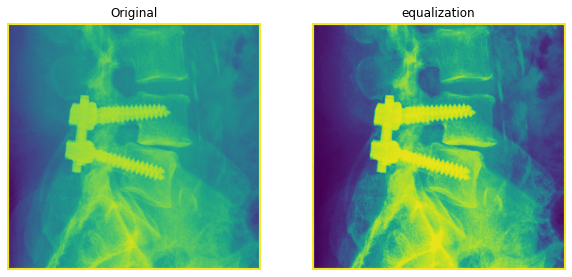

In [28]:
fig , (ax1,ax2) = plt.subplots(1,2,sharex=True,sharey=True,figsize=(10,10))

ax1.imshow(oneChannel_Image)
ax1.axis(False)
ax1.title.set_text('Original')

ax2.imshow(equalizer(oneChannel_Image))
ax2.axis(False)
ax2.title.set_text('equalization')

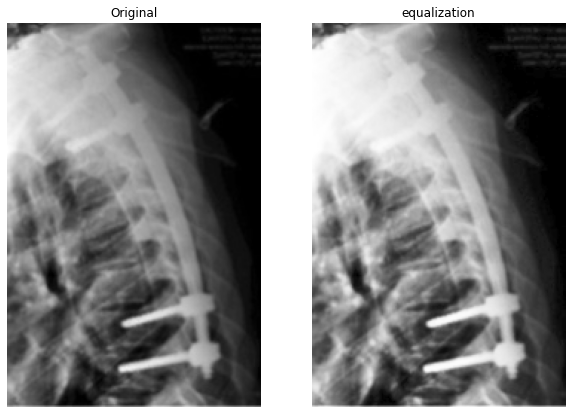

In [29]:
fig , (ax1,ax2) = plt.subplots(1,2,sharex=True,sharey=True,figsize=(10,10))

ax1.imshow(fourChannel_Image)
ax1.axis(False)
ax1.title.set_text('Original')

ax2.imshow(equalizer(fourChannel_Image))
ax2.axis(False)
ax2.title.set_text('equalization')

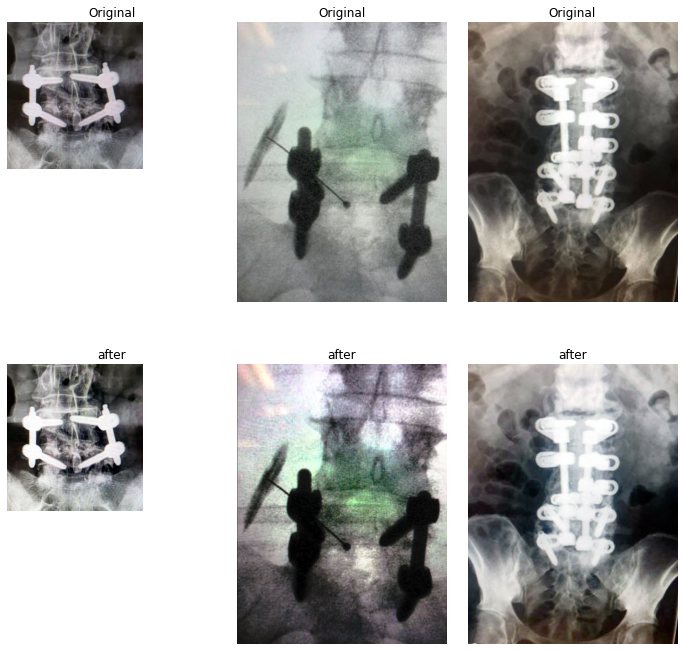

In [30]:
explore_images(equalizer)

### 2. CLAHE (Contrast Limited Adaptive Histogram Equalization)

**1. A technique to enhance the visibility of local details of an image by increasing the contrast in local regions.**

**2. It takes care of over-amplification of the contrast**

In [31]:
def clahe(img):
  img = png_jpg(img)
  if len(img.shape)>2:
    if img.shape[2] ==4:
      
      R, G, B , other = cv2.split(img)
      output1_R = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(R)
      output1_G = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(G)
      output1_B = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(B)
      output1_other = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(other)
      clah = cv2.merge((output1_R, output1_G, output1_B, output1_other))

    elif img.shape[2] ==3:
      R, G, B  = cv2.split(img)
      output1_R = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(R)
      output1_G = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(G)
      output1_B = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(B)
      clah = cv2.merge((output1_R, output1_G, output1_B))

    else:
      clah = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(img)

  else:
    clah = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(img)

  return clah

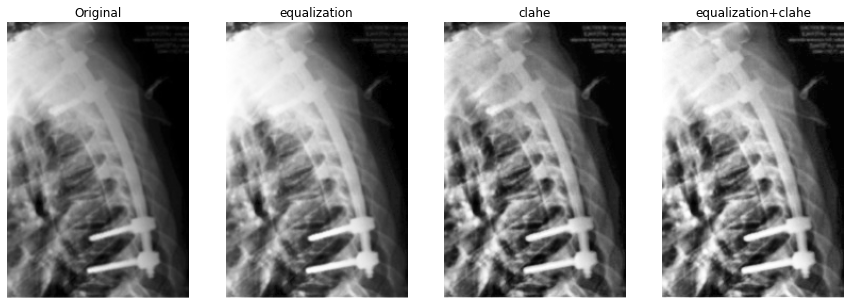

In [32]:
fig , (ax1,ax2,ax3,ax4) = plt.subplots(1,4,sharex=True,sharey=True,figsize=(15,15))

ax1.imshow(fourChannel_Image)
ax1.axis(False)
ax1.title.set_text('Original')

ax2.imshow(equalizer(fourChannel_Image))
ax2.axis(False)
ax2.title.set_text('equalization')

ax3.imshow(clahe(fourChannel_Image))
ax3.axis(False)
ax3.title.set_text('clahe')

ax4.imshow(clahe(equalizer(fourChannel_Image)))
ax4.axis(False)
ax4.title.set_text('equalization+clahe')

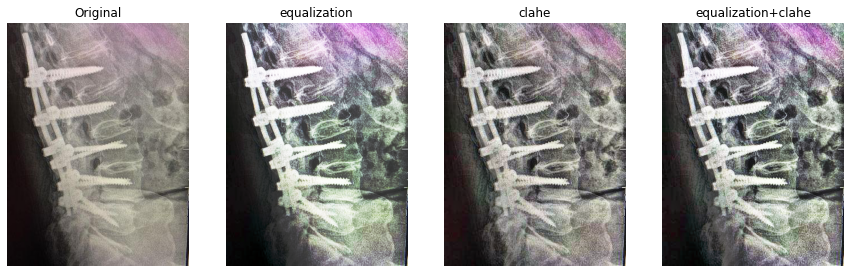

In [33]:
example_image = mpimg.imread('Implant_data/train/Viper/facebook_6361_ML.jpg')

fig , (ax1,ax2,ax3,ax4) = plt.subplots(1,4,sharex=True,sharey=True,figsize=(15,15))

ax1.imshow(example_image)
ax1.axis(False)
ax1.title.set_text('Original')

ax2.imshow(equalizer(example_image))
ax2.axis(False)
ax2.title.set_text('equalization')

ax3.imshow(clahe(example_image))
ax3.axis(False)
ax3.title.set_text('clahe')

ax4.imshow(clahe(equalizer(example_image)))
ax4.axis(False)
ax4.title.set_text('equalization+clahe')

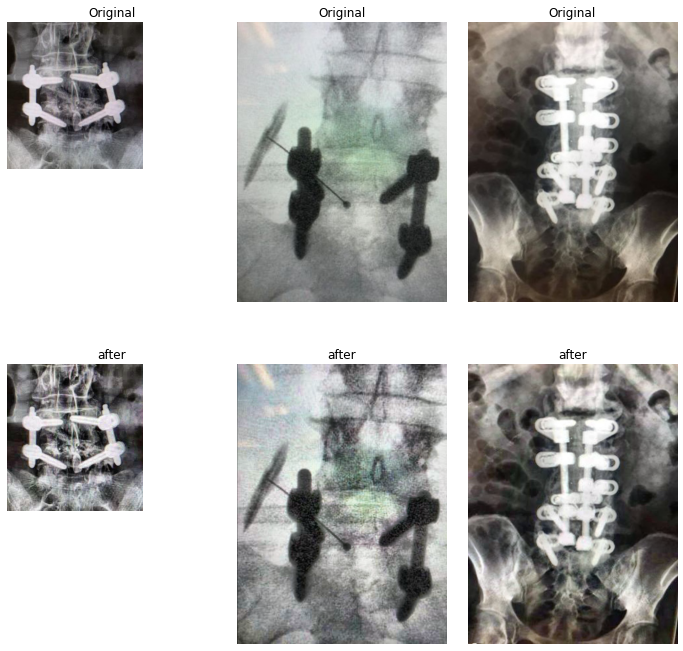

In [34]:
explore_images(clahe)

### 3. denoising 

In [35]:
def denoising(img):
  if len(img.shape)>2:
    if img.shape[2]==3:
      dst = cv2.fastNlMeansDenoisingColored(png_jpg(img),None,10,10,7,21)
    elif img.shape[2]==4:
      dst = cv2.fastNlMeansDenoisingColored(png_jpg(img[:,:,:3]),None,10,10,7,21)
    else:
      dst = cv2.fastNlMeansDenoising(png_jpg(img))
  else:
    dst = cv2.fastNlMeansDenoising(png_jpg(img))
  return dst

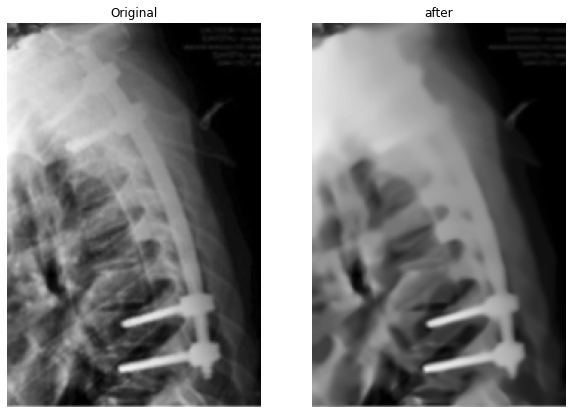

In [36]:
fig , (ax1,ax2) = plt.subplots(1,2,sharex=True,sharey=True,figsize=(10,10))
example=(denoising(fourChannel_Image))
ax1.imshow(fourChannel_Image)
ax1.axis(False)
ax1.title.set_text('Original')

ax2.imshow(example)
ax2.axis(False)
ax2.title.set_text('after')

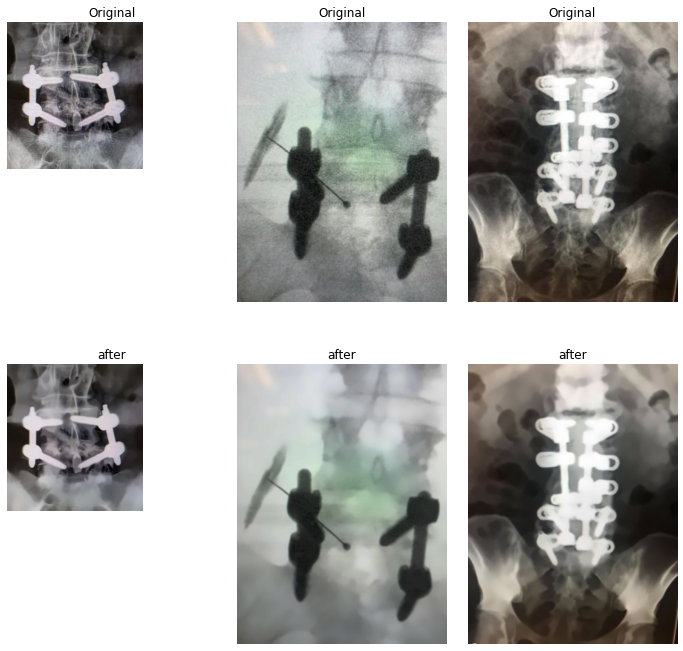

In [37]:
explore_images(denoising)

### 4. Log low transformer

In [38]:
def log_low_trasformer(img):

  R, G, B  = cv2.split(img)
  output1_R = cv2.pow(R.astype(np.float32),1.1)
  output1_G = cv2.pow(G.astype(np.float32),1.1)
  output1_B = cv2.pow(B.astype(np.float32),1.1)
  im = cv2.merge((output1_R, output1_G, output1_B))
  im = im.astype(np.uint8)

  return im

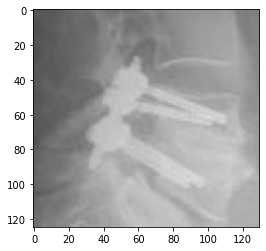

In [39]:
plt.imshow(threeChannel_Image)

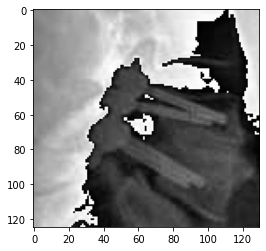

In [40]:
plt.imshow(log_low_trasformer(threeChannel_Image))

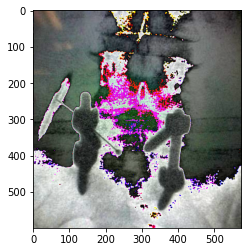

In [41]:
plt.imshow(log_low_trasformer(test2))

**Notes:**

* All enhancement quality images functions are working properly with single channel. I seperate image channels using split function into R,G,B layers.
* Most of functions fail with images that dtype of array is **float**, so I convert them into np.uint8 type within range of 0-255.
* choosing the suitable enhancement function based on model's accuracy. Experiment, Experiment, Experiment.

# Models with pre-processing

In [42]:
def equalizer(img):
  img=np.array(img)
  img = png_jpg(img)
  if len(img.shape)>2:

    if img.shape[2]==3:
      img = img.astype(np.uint8)
      R, G, B = cv2.split(img)
      output1_R = cv2.equalizeHist(R)
      output1_G = cv2.equalizeHist(G)
      output1_B = cv2.equalizeHist(B)
      equ = cv2.merge((output1_R, output1_G, output1_B))

    elif img.shape[2]==4:
      img = img.astype(np.uint8)
      R, G, B , other = cv2.split(img)
      output1_R = cv2.equalizeHist(R)
      output1_G = cv2.equalizeHist(G)
      output1_B = cv2.equalizeHist(B)
      output1_other = cv2.equalizeHist(other)
      equ = cv2.merge((output1_R, output1_G, output1_B,output1_other))

    else:
      img = img.astype(np.uint8)
      equ = cv2.equalizeHist(img)
  else:
    img = img.astype(np.uint8)
    equ = cv2.equalizeHist(img)

  return equ/255.

In [43]:
def clahe(img):
  img = png_jpg(img)
  if len(img.shape)>2:
    if img.shape[2] ==4:
      
      R, G, B , other = cv2.split(img)
      output1_R = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(R)
      output1_G = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(G)
      output1_B = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(B)
      output1_other = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(other)
      clah = cv2.merge((output1_R, output1_G, output1_B, output1_other))

    elif img.shape[2] ==3:
      R, G, B  = cv2.split(img)
      output1_R = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(R)
      output1_G = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(G)
      output1_B = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(B)
      clah = cv2.merge((output1_R, output1_G, output1_B))

    else:
      clah = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(img)

  else:
    clah = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(img)

  return clah/255.

In [44]:
def denoising(img):
  if len(img.shape)>2:
    if img.shape[2]==3:
      dst = cv2.fastNlMeansDenoisingColored(png_jpg(img),None,10,10,7,21)
    elif img.shape[2]==4:
      dst = cv2.fastNlMeansDenoisingColored(png_jpg(img[:,:,:3]),None,10,10,7,21)
    else:
      dst = cv2.fastNlMeansDenoising(png_jpg(img))
  else:
    dst = cv2.fastNlMeansDenoising(png_jpg(img))
  return dst/255.

### load data

In [45]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Setup the train and test directories
train_dir = 'Implant_data/train'
test_dir = 'Implant_data/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(128,128),
                                               color_mode='rgb',class_mode="categorical",shuffle=True)

valid_data = train_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(128,128),
                                               color_mode='rgb',class_mode="categorical",shuffle=True)

Found 553 images belonging to 6 classes.
Found 114 images belonging to 6 classes.


In [46]:
# Create a CNN model
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=2,kernel_size=3,activation='relu',input_shape=(128,128,3)),
                                      tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
                                      tf.keras.layers.Conv2D(filters=2,kernel_size=3,activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(6,activation='sigmoid')
])


model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=['accuracy'])

history_1 = model_1.fit(train_data,epochs=4,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data),shuffle=True)

Epoch 1/4
18/18 [==============================] - 4s 219ms/step - loss: 1.8155 - accuracy: 0.1808 - val_loss: 1.7299 - val_accuracy: 0.3596
Epoch 2/4
18/18 [==============================] - 4s 197ms/step - loss: 1.7276 - accuracy: 0.2731 - val_loss: 1.7079 - val_accuracy: 0.3421
Epoch 3/4
18/18 [==============================] - 4s 200ms/step - loss: 1.7172 - accuracy: 0.2749 - val_loss: 1.7059 - val_accuracy: 0.2982
Epoch 4/4
18/18 [==============================] - 4s 197ms/step - loss: 1.7146 - accuracy: 0.2839 - val_loss: 1.7058 - val_accuracy: 0.3333


## Creating models using TensorFlow Hub

In [47]:
efficient_url_hub = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'

resnet_url_hub= 'https://tfhub.dev/google/imagenet/resnet_v1_50/classification/5'

efficient_url_class = 'https://tfhub.dev/tensorflow/efficientnet/b0/classification/1'




In [48]:
import tensorflow_hub as hub
from tensorflow.keras import layers

In [49]:
# Let's make a create_model() function to create a model from a URL

def create_model(model_url, num_classes=6):
  """  
  Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in the output layer,
      should be equal to number of target classes, default 10.
  
  Returns:
    An uncompiled Keras Sequential model with model_url as feature extractor
    layer and Dense output layer with num_classes output neurons.
  """
  feature_extractor_layer=hub.KerasLayer(model_url, trainable=False,# freeze the already learned patterns
                                         name='feature_extractor_layer',
                                         input_shape=(224,224,3))
  
  #create our own model
  model=tf.keras.Sequential([
                             feature_extractor_layer,
                             layers.Dense(num_classes, activation='softmax',name='output_layer')
                            
  ])

  return model

In [50]:
# create resnet50 model

efficient_url = create_model(efficient_url_class, num_classes=6)
# compile our resnet model
efficient_url.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [51]:
tf.random.set_seed(42)
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Setup the train and test directories
train_dir = 'Implant_data/train'
test_dir = 'Implant_data/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(128,128),
                                               color_mode='rgb',class_mode="categorical",shuffle=True)

valid_data = train_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(128,128),
                                               color_mode='rgb',class_mode="categorical",shuffle=True)

Found 553 images belonging to 6 classes.
Found 114 images belonging to 6 classes.


In [52]:
# Let's fit our ResNet model to the data (10 percent of 10 classes)
resnet_history = efficient_url.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=valid_data,
                                  validation_steps=len(valid_data), shuffle = True)

Epoch 1/10
18/18 [==============================] - 15s 299ms/step - loss: 1.7891 - accuracy: 0.1917 - val_loss: 1.7892 - val_accuracy: 0.1579
Epoch 2/10
18/18 [==============================] - 4s 221ms/step - loss: 1.7819 - accuracy: 0.2604 - val_loss: 1.7823 - val_accuracy: 0.1930
Epoch 3/10
18/18 [==============================] - 4s 224ms/step - loss: 1.7748 - accuracy: 0.2839 - val_loss: 1.7757 - val_accuracy: 0.2281
Epoch 4/10
18/18 [==============================] - 4s 228ms/step - loss: 1.7686 - accuracy: 0.2821 - val_loss: 1.7690 - val_accuracy: 0.2895
Epoch 5/10
18/18 [==============================] - 4s 224ms/step - loss: 1.7622 - accuracy: 0.2875 - val_loss: 1.7630 - val_accuracy: 0.3070
Epoch 6/10
18/18 [==============================] - 4s 224ms/step - loss: 1.7563 - accuracy: 0.2803 - val_loss: 1.7574 - val_accuracy: 0.3070
Epoch 7/10
18/18 [==============================] - 4s 226ms/step - loss: 1.7507 - accuracy: 0.2821 - val_loss: 1.7520 - val_accuracy: 0.2895
Epoch

## resnet50

In [53]:
RegNetY  = 'https://tfhub.dev/tensorflow/resnet_50/classification/1'
RegNet = create_model(RegNetY, num_classes=6)

In [54]:
# compile our resnet model
RegNet.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

tf.random.set_seed(42)
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Setup the train and test directories
train_dir = 'Implant_data/train'
test_dir = 'Implant_data/test'

# Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),color_mode='rgb',class_mode="categorical",shuffle=True)

valid_data=train_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),color_mode='rgb',class_mode="categorical",shuffle=True)


# Let's fit our ResNet model to the data (10 percent of 10 classes)
resnet_history = RegNet.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=valid_data,
                                  validation_steps=len(valid_data), shuffle = True)

Found 553 images belonging to 6 classes.
Found 114 images belonging to 6 classes.
Epoch 1/5
18/18 [==============================] - 14s 360ms/step - loss: 1.7901 - accuracy: 0.2116 - val_loss: 1.7828 - val_accuracy: 0.2544
Epoch 2/5
18/18 [==============================] - 5s 295ms/step - loss: 1.7821 - accuracy: 0.2785 - val_loss: 1.7751 - val_accuracy: 0.3246
Epoch 3/5
18/18 [==============================] - 5s 300ms/step - loss: 1.7746 - accuracy: 0.2929 - val_loss: 1.7683 - val_accuracy: 0.3246
Epoch 4/5
18/18 [==============================] - 6s 310ms/step - loss: 1.7683 - accuracy: 0.2966 - val_loss: 1.7616 - val_accuracy: 0.3158
Epoch 5/5
18/18 [==============================] - 6s 305ms/step - loss: 1.7619 - accuracy: 0.2911 - val_loss: 1.7554 - val_accuracy: 0.3158


In [55]:
# compile our resnet model
RegNet.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.0001),metrics=['accuracy'])

tf.random.set_seed(42)
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)

train_datagen = ImageDataGenerator(rescale=1/255.,preprocessing_function=clahe)
test_datagen = ImageDataGenerator(rescale=1/255.,preprocessing_function=clahe)

# Setup the train and test directories
train_dir = 'Implant_data/train'
test_dir = 'Implant_data/test'

# Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),color_mode='rgb',class_mode="categorical",shuffle=True)

valid_data=train_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),color_mode='rgb',class_mode="categorical",shuffle=True)


# Let's fit our ResNet model to the data (10 percent of 10 classes)
resnet_history = RegNet.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=valid_data,
                                  validation_steps=len(valid_data), shuffle = True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Found 553 images belonging to 6 classes.
Found 114 images belonging to 6 classes.
Epoch 1/10
18/18 [==============================] - 10s 444ms/step - loss: 1.7688 - accuracy: 0.2694 - val_loss: 1.7610 - val_accuracy: 0.3070
Epoch 2/10
18/18 [==============================] - 7s 375ms/step - loss: 1.7688 - accuracy: 0.2694 - val_loss: 1.7610 - val_accuracy: 0.3070
Epoch 3/10
18/18 [==============================] - 7s 373ms/step - loss: 1.7688 - accuracy: 0.2694 - val_loss: 1.7609 - val_accuracy: 0.3070
Epoch 4/10
18/18 [==============================] - 7s 370ms/step - loss: 1.7688 - accuracy: 0.2694 - val_loss: 1.7609 - val_accuracy: 0.3070
Epoch 5/10
18/18 [==============================] - 7s 364ms/step - loss: 1.7687 - accuracy: 0.2694 - val_loss: 1.7609 - val_accuracy: 0.3070
Epoch 6/10
18/18 [==============================] - 7s 364ms/step - loss: 1.7687 - accuracy: 0.2694 - val_loss: 1.7608 - val_accuracy: 0.3070
Epoch 7/10
18/18 [==============================] - 7s 362ms/step

## fastai

In [ ]:
!pip install fastai --upgrade

In [ ]:
!pip install fastai==2.2.5


      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
  Attempting uninstall: fastai
    Found existing installation: fastai 2.5.3
    Uninstalling fastai-2.5.3:
      Successfully uninstalled fastai-2.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.7.1 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.7.1 which is incompatible.


In [ ]:
from fastai.vision.all import *

In [ ]:
def to_grayscale(img):
  return img.convert('L')

class GreyScaleTfm(Transform):
  def encodes(self, img: Image.Image):
    return to_grayscale(img)

img_size = 224

In [ ]:
os.listdir('/content/drive/MyDrive/Implant_data/')

['train', 'test']

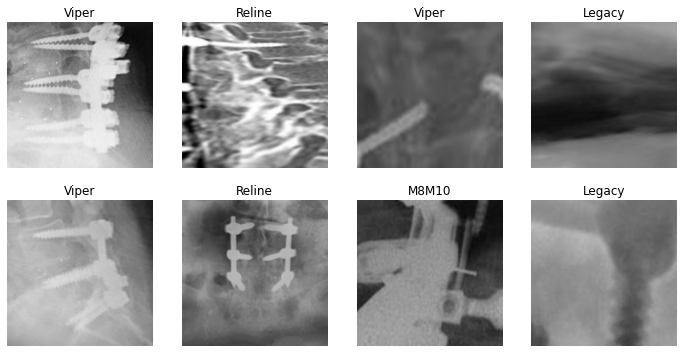

In [ ]:
str='/content/drive/MyDrive/Implant_data_Final_aug'
p = Path(str)
dls = ImageDataLoaders.from_folder(p, train='train', valid='test',  bs=8, item_tfms=[GreyScaleTfm(order=0), Resize(img_size, method='squish', order=1)],batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)])
files = get_image_files(p)
len(files)
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(150)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,2.691244,2.680296,0.265487,01:01


epoch,train_loss,valid_loss,accuracy,time
0,1.971658,2.009452,0.353982,01:12
1,1.779465,1.743238,0.371681,01:11
2,1.618760,1.721528,0.371681,01:10
3,1.464686,1.761087,0.469027,01:10
4,1.287844,1.745259,0.460177,01:10
5,1.183413,1.906477,0.389381,01:10
6,1.060891,1.949207,0.415929,01:10
7,1.025766,2.101055,0.398230,01:10
8,1.010101,2.268047,0.460177,01:10
9,0.921304,2.321744,0.389381,01:10


In [ ]:
testFolder='/content/drive/MyDrive/Implant_data_aug/test/'
files = get_image_files(testFolder)
files

(#114) [Path('/content/drive/MyDrive/Implant_data_aug/test/Viper/image003_test222.jpg'),Path('/content/drive/MyDrive/Implant_data_aug/test/Viper/img_5772.jpg'),Path('/content/drive/MyDrive/Implant_data_aug/test/Viper/expedium_ pmc3170270_1.png'),Path('/content/drive/MyDrive/Implant_data_aug/test/Viper/spinal_xray_789__ML.jpg'),Path('/content/drive/MyDrive/Implant_data_aug/test/Viper/facebook_7473_ML.jpg'),Path('/content/drive/MyDrive/Implant_data_aug/test/Viper/viper_ pmc3809439_1.png'),Path('/content/drive/MyDrive/Implant_data_aug/test/Viper/spinal_xray_81_ML.jpg'),Path('/content/drive/MyDrive/Implant_data_aug/test/Viper/image002_test_209.png'),Path('/content/drive/MyDrive/Implant_data_aug/test/Viper/expedium_xray3.png'),Path('/content/drive/MyDrive/Implant_data_aug/test/Viper/facebook_4737_ML.jpg')...]

In [ ]:
counter=0
correct=0
for i in os.listdir('/content/drive/MyDrive/Implant_data_aug/test'):
  for j in os.listdir('/content/drive/MyDrive/Implant_data_aug/test/'+i):
    counter=counter+1
    p=learn.predict('/content/drive/MyDrive/Implant_data_aug/test/'+i+'/'+j)
    if p[0]==i:
      correct=correct+1
print(counter,correct) 

114 61


In [ ]:
correct/counter

0.5350877192982456

In [ ]:
learn.save('model_withAugmentation.h5')

Path('/content/drive/MyDrive/Implant_data_aug/models/model_withAugmentation.h5.pth')